In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests

In [73]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
data = pd.read_csv(url)
data['data'] = [data['data'][x][:-9] for x in range(len(data))]

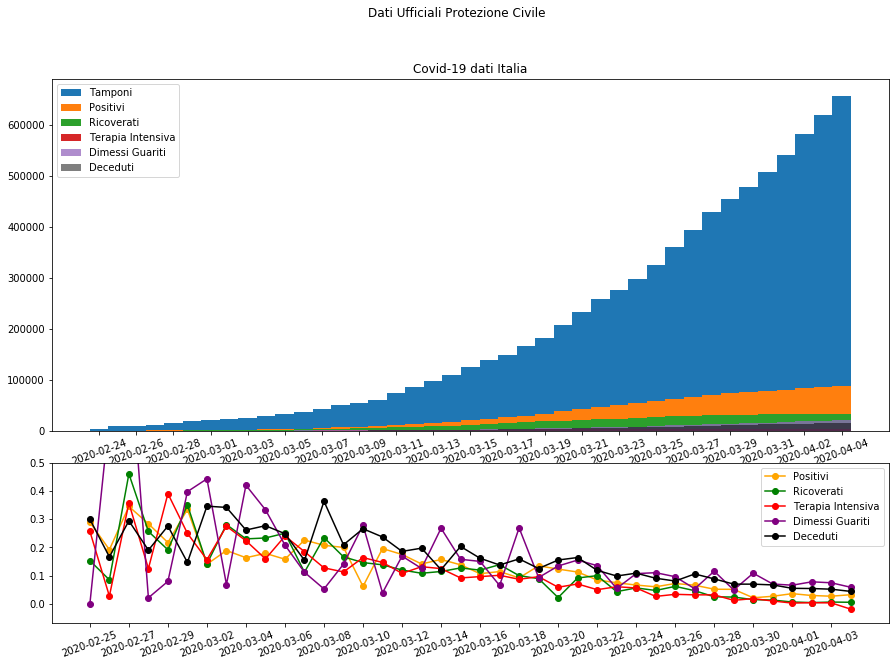

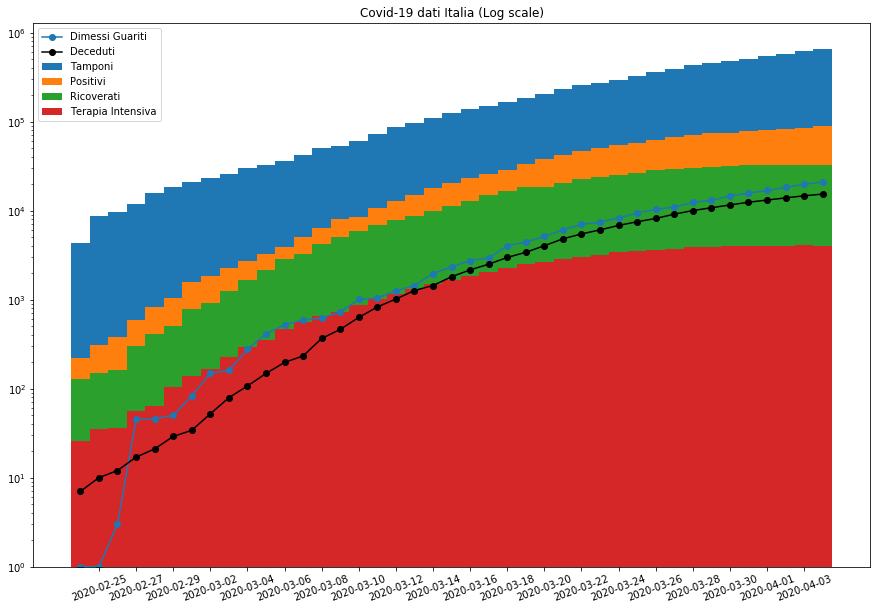

In [75]:
#Visualizations (hist)
fig =plt.figure(figsize=(15, 10))
grid = plt.GridSpec(nrows=3,ncols=1)
ax = fig.add_subplot(grid[0:2])
width = 1
ax.bar(data['data'], data['tamponi'], width, label='Tamponi');
ax.bar(data['data'], data['totale_positivi'], width, label='Positivi');
ax.bar(data['data'], data['totale_ospedalizzati'],width, label='Ricoverati');
ax.bar(data['data'], data['terapia_intensiva'],width, label='Terapia Intensiva');
ax.bar(data['data'], data['dimessi_guariti'], width, label='Dimessi Guariti',alpha=0.75);
ax.bar(data['data'], data['deceduti'], width, label='Deceduti',color='black',alpha=0.5);
plt.title('Covid-19 '+ 'dati Italia')
plt.legend()
plt.xticks([data['data'][x] for x in range(0,len(data),2)],rotation=20);

perc = pd.DataFrame(columns=['tamponi','totale_casi','totale_ospedalizzati','terapia_intensiva','dimessi_guariti','deceduti'])
for i in range(1,len(data)):
    perc = perc.append({'tamponi' : (data['tamponi'][i] - data['tamponi'][i-1])/data['tamponi'][i],
                        'totale_positivi' : (data['totale_positivi'][i] - data['totale_positivi'][i-1])/data['totale_positivi'][i],
                        'totale_ospedalizzati' : (data['totale_ospedalizzati'][i] - data['totale_ospedalizzati'][i-1])/data['totale_ospedalizzati'][i],
                        'terapia_intensiva' : (data['terapia_intensiva'][i] - data['terapia_intensiva'][i-1])/data['terapia_intensiva'][i],
                        'dimessi_guariti' : (data['dimessi_guariti'][i] - data['dimessi_guariti'][i-1])/data['dimessi_guariti'][i],
                        'deceduti' : (data['deceduti'][i] - data['deceduti'][i-1])/data['deceduti'][i]},
                        ignore_index=True)
ax_p = fig.add_subplot(grid[2])
#ax_p.plot(data['data'][1:], perc['tamponi'],'-o', label='Tamponi')
ax_p.plot(data['data'][1:], perc['totale_positivi'],'-o', label='Positivi',color='orange')
ax_p.plot(data['data'][1:], perc['totale_ospedalizzati'],'-o', label='Ricoverati', color='green')
ax_p.plot(data['data'][1:], perc['terapia_intensiva'],'-o', label='Terapia Intensiva', color='red')
ax_p.plot(data['data'][1:], perc['dimessi_guariti'],'-o', label='Dimessi Guariti', color ='purple')
ax_p.plot(data['data'][1:], perc['deceduti'],'-o', label='Deceduti', color='black')
plt.xticks([data['data'][x] for x in range(1,len(data),2)],rotation=20);
plt.legend()
plt.ylim(top=0.5)
plt.suptitle('Dati Ufficiali Protezione Civile')
plt.show()

#Visualizations (log)
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.bar(data['data'], data['tamponi'], width, label='Tamponi');
ax.bar(data['data'], data['totale_positivi'], width, label='Positivi');
ax.bar(data['data'], data['totale_ospedalizzati'],width, label='Ricoverati');
ax.bar(data['data'], data['terapia_intensiva'],width, label='Terapia Intensiva');
ax.plot(data['data'], data['dimessi_guariti'], 'o-', label='Dimessi Guariti');
ax.plot(data['data'], data['deceduti'], 'o-', label='Deceduti',color='black');
plt.title('Covid-19 '+ 'dati Italia (Log scale)')
plt.legend()
ax.set_yscale('log')
plt.xticks([data['data'][x] for x in range(1,len(data),2)],rotation=20);
plt.ylim(bottom=1)
plt.show()